In [3]:
!pip install pandas==1.5.3
!pip install seaborn==0.13.1
!pip install matplotlib==3.7.1
!pip install numpy==1.25.2
!pip install tensorflow==2.15.0
!pip install scikit-learn==1.2.2
!pip install keras==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 47.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.8.0 requires cubinlinker, which is not installed.
cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 23.8.0 requires ptxcompiler, which is not installed.
cuml 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
beatrix-jupyterlab 2023.128.151533 requires jupyterlab~=3.6.0, but you have jupyterlab 4.1.2 which is incompatible.
cudf 23.8.0 requires cuda-python<12.0a0,>=11.7.1, but you have cuda-

In [4]:
import os
import pathlib
import pandas
import seaborn
import matplotlib
import numpy 
import tensorflow
import sklearn
import keras

print('pandas ', pandas.__version__)
print('seaborn ', seaborn.__version__)
print('matplotlib ', matplotlib.__version__)
print('numpy ', numpy.__version__)
print('tensorflow ', tensorflow.__version__)
print('sklearn ', sklearn.__version__)
print('keras ', keras.__version__)

2024-03-27 13:08:56.822450: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-27 13:08:56.822591: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-27 13:08:57.015415: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


pandas  1.5.3
seaborn  0.13.1
matplotlib  3.7.5
numpy  1.26.4
tensorflow  2.15.0
sklearn  1.2.2
keras  2.15.0


In [5]:
DATA_PATH = '/kaggle/input/qwqqqqq/skin-lesions_2'

In [6]:
import os

for dir_path, dir_names, file_names in os.walk(DATA_PATH):
    print(f"По указанном пути {len(dir_names)} каталога\ов и {len(file_names)} изображений ('{dir_path}')")


По указанном пути 3 каталога\ов и 0 изображений ('/kaggle/input/qwqqqqq/skin-lesions_2')
По указанном пути 0 каталога\ов и 521 изображений ('/kaggle/input/qwqqqqq/skin-lesions_2/melanoma')
По указанном пути 0 каталога\ов и 463 изображений ('/kaggle/input/qwqqqqq/skin-lesions_2/seborrheic_keratosis')
По указанном пути 0 каталога\ов и 1843 изображений ('/kaggle/input/qwqqqqq/skin-lesions_2/nevus')


In [7]:
from pathlib import Path
import pandas as pd

# для последующего анализа преобразуем пути к картинкам, в датафрейм (file_paths\labels)
def convert_data_to_df(data_path):
    data_dir = Path(data_path)

    # ищем все изображения в data_dir
    file_paths = list(data_dir.glob(r'**/*.JPG'))\
               + list(data_dir.glob(r'**/*.jpg'))\
               + list(data_dir.glob(r'**/*.jpeg'))\
               + list(data_dir.glob(r'**/*.PNG'))

    # получаем мтеки
    labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_paths))

    # делаем dataFrame
    data_df = pd.DataFrame({'File_path' : file_paths,
                            'Label' : labels})

    return data_df

DATA_DF = convert_data_to_df(DATA_PATH)
DATA_DF.head()
# print(DATA_DF['File_path'][0].dtype())

,File_path,Label
0,/kaggle/input/qwqqqqq/skin-lesions_2/melanoma/...,melanoma
1,/kaggle/input/qwqqqqq/skin-lesions_2/melanoma/...,melanoma
2,/kaggle/input/qwqqqqq/skin-lesions_2/melanoma/...,melanoma
3,/kaggle/input/qwqqqqq/skin-lesions_2/melanoma/...,melanoma
4,/kaggle/input/qwqqqqq/skin-lesions_2/melanoma/...,melanoma


In [8]:
print('Кол-во изображений\меток:\n')
DATA_DF.nunique()

Кол-во изображений\меток:



File_path    2827
Label           3
dtype: int64

In [9]:
print('Кол-во изображений каждой метки:\n')
DATA_DF['Label'].value_counts()

Кол-во изображений каждой метки:



nevus                   1843
melanoma                 521
seborrheic_keratosis     463
Name: Label, dtype: int64

/tmp/ipykernel_34/51033260.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = quantity_labels_data.index,


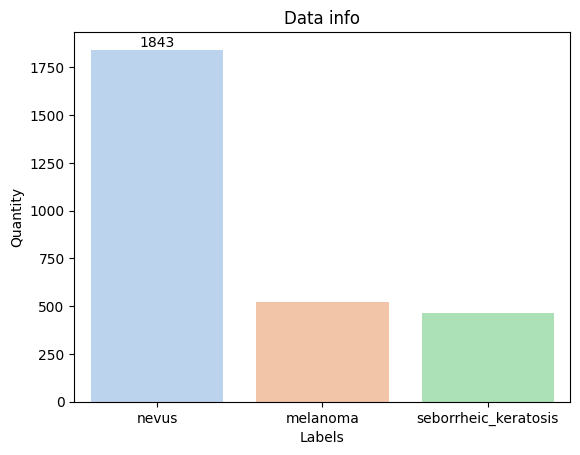

In [10]:
import seaborn as sns

def plot_hist_data(data_df, name_bar):

    quantity_labels_data = data_df['Label'].value_counts()

    ax = sns.barplot(x = quantity_labels_data.index,
                     y = quantity_labels_data.values,
                     alpha=0.8,
                     palette='pastel')

    ax.set(xlabel = 'Labels',
          ylabel = 'Quantity',
          title = name_bar)

    ax.bar_label(ax.containers[0])

plot_hist_data(DATA_DF, 'Data info')

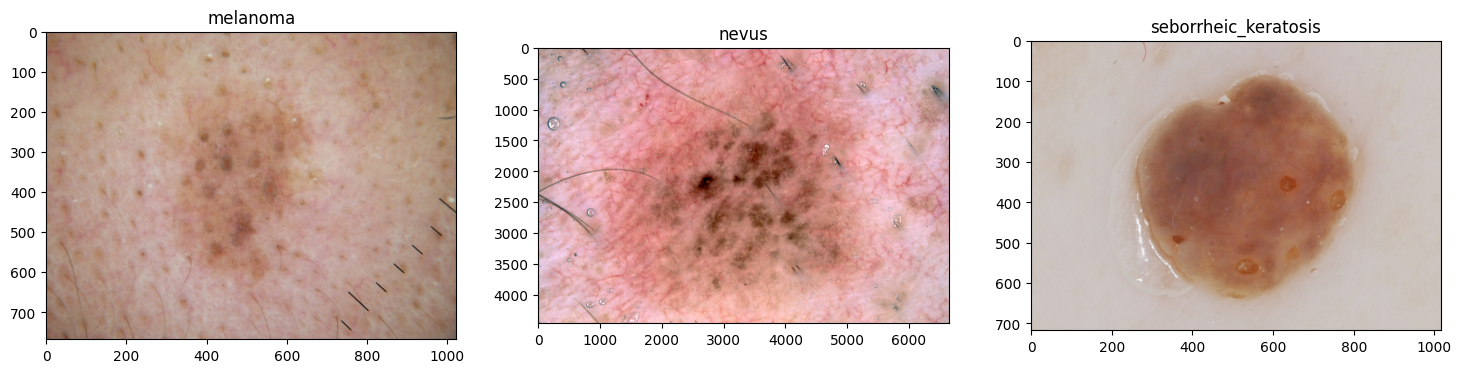

In [9]:
# посмотрим на изображения
import matplotlib.pyplot as plt

def show_example_img(data_df, num_img):
    # Группируем DataFrame по меткам
    groups = data_df.groupby('Label')

    fig, axs = plt.subplots(1, len(groups), figsize=(18, 10))

    # Проходим по каждой группе и отображаем ее n-ое изображение
    for i, (label, group) in enumerate(groups):
        img = plt.imread(group['File_path'].iloc[num_img])
        axs[i].imshow(img)
        axs[i].set_title(label)

    plt.show()

show_example_img(DATA_DF, 100)

In [11]:
import numpy as np
from sklearn.utils import resample

# Новые данные генерируются путем копирования записей из классов меньшинства для увеличения количества выборок
'''
нужно для того, чтобы сбалансировать распределение классов в наборе данных, что может
повысить производительность моделей машинного обучения. Увеличивая количество выборок
в классах меньшинства, модель может узнать больше об этих классах и сделать более
точные прогнозы.
'''

# словарь уникальных меток и соответствующих им индексов
feature_names = {i: label for i, label in enumerate(DATA_DF['Label'].unique())}

def upsample(df, path_name, label_name, n_samples = max(DATA_DF['Label'].value_counts())):
    # находим индексы строк с метками в словаре Feature_names и удаляем их
    upsample_idx = [i for i, label in enumerate(df[label_name])
                      if label in feature_names.values()]

    new_df = df.drop(df.index[upsample_idx])

    # повторно дискретизируем оставшиеся строки, чтобы на каждую метку было n_samples
    resampled_df = df.iloc[upsample_idx].groupby(label_name).apply(lambda x: resample(x, n_samples=n_samples, random_state=0))
    resampled_df.index = resampled_df.index.droplevel(0)

    new_df = pd.concat([new_df, resampled_df])

    return new_df[[path_name, label_name]]

up_data_df = upsample(DATA_DF, 'File_path', 'Label')

up_data_df

,File_path,Label
192,/kaggle/input/qwqqqqq/skin-lesions_2/melanoma/...,melanoma
359,/kaggle/input/qwqqqqq/skin-lesions_2/melanoma/...,melanoma
9,/kaggle/input/qwqqqqq/skin-lesions_2/melanoma/...,melanoma
277,/kaggle/input/qwqqqqq/skin-lesions_2/melanoma/...,melanoma
70,/kaggle/input/qwqqqqq/skin-lesions_2/melanoma/...,melanoma
...,...,...
723,/kaggle/input/qwqqqqq/skin-lesions_2/seborrhei...,seborrheic_keratosis
654,/kaggle/input/qwqqqqq/skin-lesions_2/seborrhei...,seborrheic_keratosis
861,/kaggle/input/qwqqqqq/skin-lesions_2/seborrhei...,seborrheic_keratosis
960,/kaggle/input/qwqqqqq/skin-lesions_2/seborrhei...,seborrheic_keratosis


In [12]:
up_data_df = up_data_df.astype('string')

In [13]:
up_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5529 entries, 192 to 699
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   File_path  5529 non-null   string
 1   Label      5529 non-null   string
dtypes: string(2)
memory usage: 129.6 KB


/tmp/ipykernel_34/51033260.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = quantity_labels_data.index,


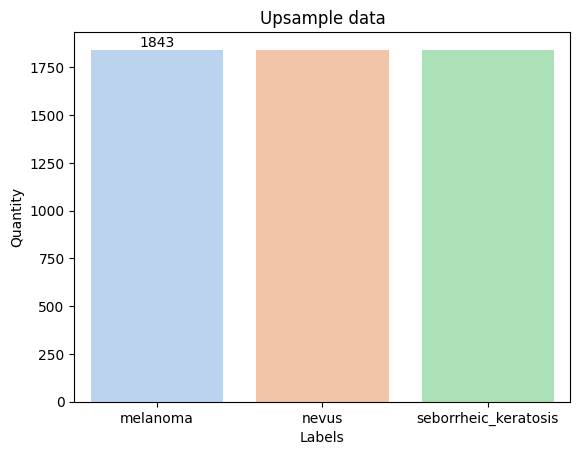

In [14]:
plot_hist_data(up_data_df, 'Upsample data')

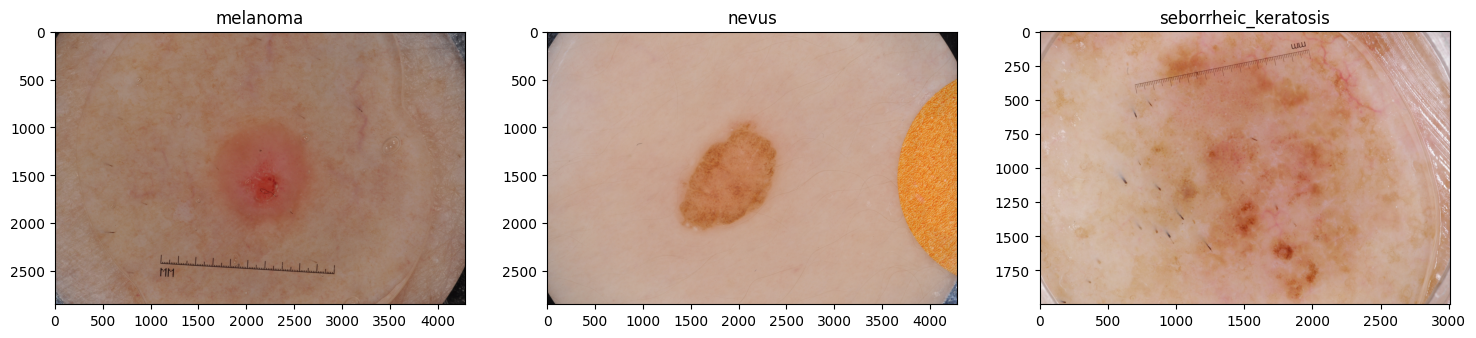

In [14]:
show_example_img(up_data_df, 1500)

In [15]:
# разделим даные на выборки
from sklearn.model_selection import train_test_split

train_valid_df, test_df = train_test_split(up_data_df, test_size = 0.2, random_state = 1)
train_df, valid_df = train_test_split(train_valid_df, test_size=0.2, random_state = 1)

train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

print(f'train_df: {train_df.shape}\nvalid_df: {valid_df.shape}\ntest_df: {test_df.shape}')

train_df: (3538, 2)
valid_df: (885, 2)
test_df: (1106, 2)


/tmp/ipykernel_34/51033260.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = quantity_labels_data.index,


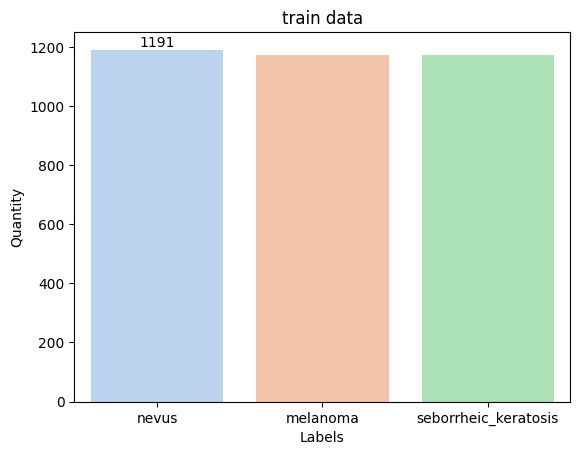

In [16]:
plot_hist_data(train_df, 'train data')

/tmp/ipykernel_34/51033260.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = quantity_labels_data.index,


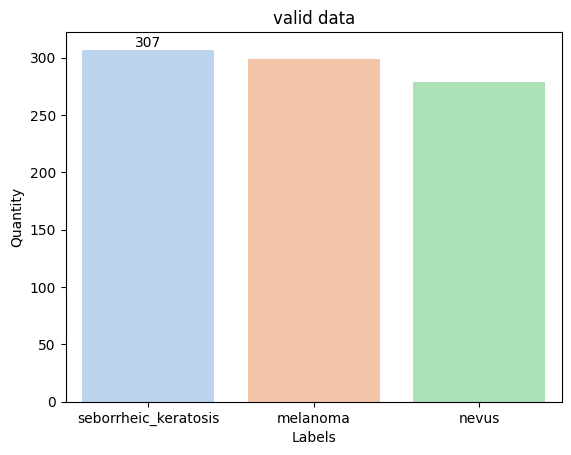

In [17]:
plot_hist_data(valid_df, 'valid data')

/tmp/ipykernel_34/51033260.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = quantity_labels_data.index,


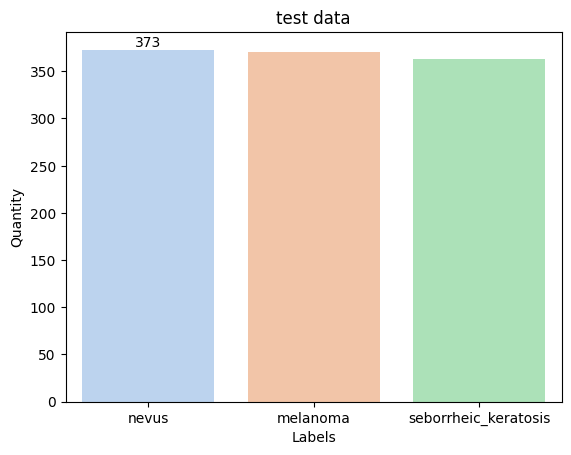

In [18]:
plot_hist_data(test_df, 'test data')

In [19]:
WIDTH_SIZE = 224
HEIGHT_SIZE = 224
CHANNELS = 3
BATCH_SIZE = 32

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_datagen = ImageDataGenerator(rescale=1/255,
                                 rotation_range=20,
                                 zoom_range=0.1,
                                 width_shift_range=0.05,
                                 height_shift_range=0.05,
                                 horizontal_flip=True,
                                 vertical_flip=True,
                                 fill_mode='nearest')

train_generator = img_datagen.flow_from_dataframe(train_df,
                                                  x_col = 'File_path',
                                                  y_col = 'Label',
                                                  target_size = (HEIGHT_SIZE, WIDTH_SIZE),
                                                  color_mode='rgb',
                                                  class_mode = 'categorical',
                                                  batch_size = BATCH_SIZE,
                                                  shuffle = True,
                                                  seed = 0)

valid_generator = img_datagen.flow_from_dataframe(valid_df,
                                                  x_col = 'File_path',
                                                  y_col = 'Label',
                                                  target_size = (HEIGHT_SIZE, WIDTH_SIZE),
                                                  color_mode='rgb',
                                                  class_mode = 'categorical',
                                                  batch_size = BATCH_SIZE,
                                                  shuffle = True,
                                                  seed = 0)

test_generator = img_datagen.flow_from_dataframe(test_df,
                                                 x_col = 'File_path',
                                                 y_col = 'Label',
                                                 target_size = (HEIGHT_SIZE, WIDTH_SIZE),
                                                 color_mode='rgb',
                                                 class_mode = 'categorical',
                                                 batch_size = BATCH_SIZE,
                                                 shuffle = True,
                                                 seed = 1)

Found 3538 validated image filenames belonging to 3 classes.
Found 885 validated image filenames belonging to 3 classes.
Found 1106 validated image filenames belonging to 3 classes.


In [21]:
# пример работы генератора
example_df = train_df.sample(n = 2).reset_index(drop = True)

example_generator = img_datagen.flow_from_dataframe(valid_df,
                                                    x_col = 'File_path',
                                                    y_col = 'Label',
                                                    target_size = (HEIGHT_SIZE, WIDTH_SIZE),
                                                    color_mode='rgb',
                                                    class_mode = 'categorical',
                                                    batch_size = BATCH_SIZE,
                                                    shuffle = True,
                                                    seed = 1)

Found 885 validated image filenames belonging to 3 classes.


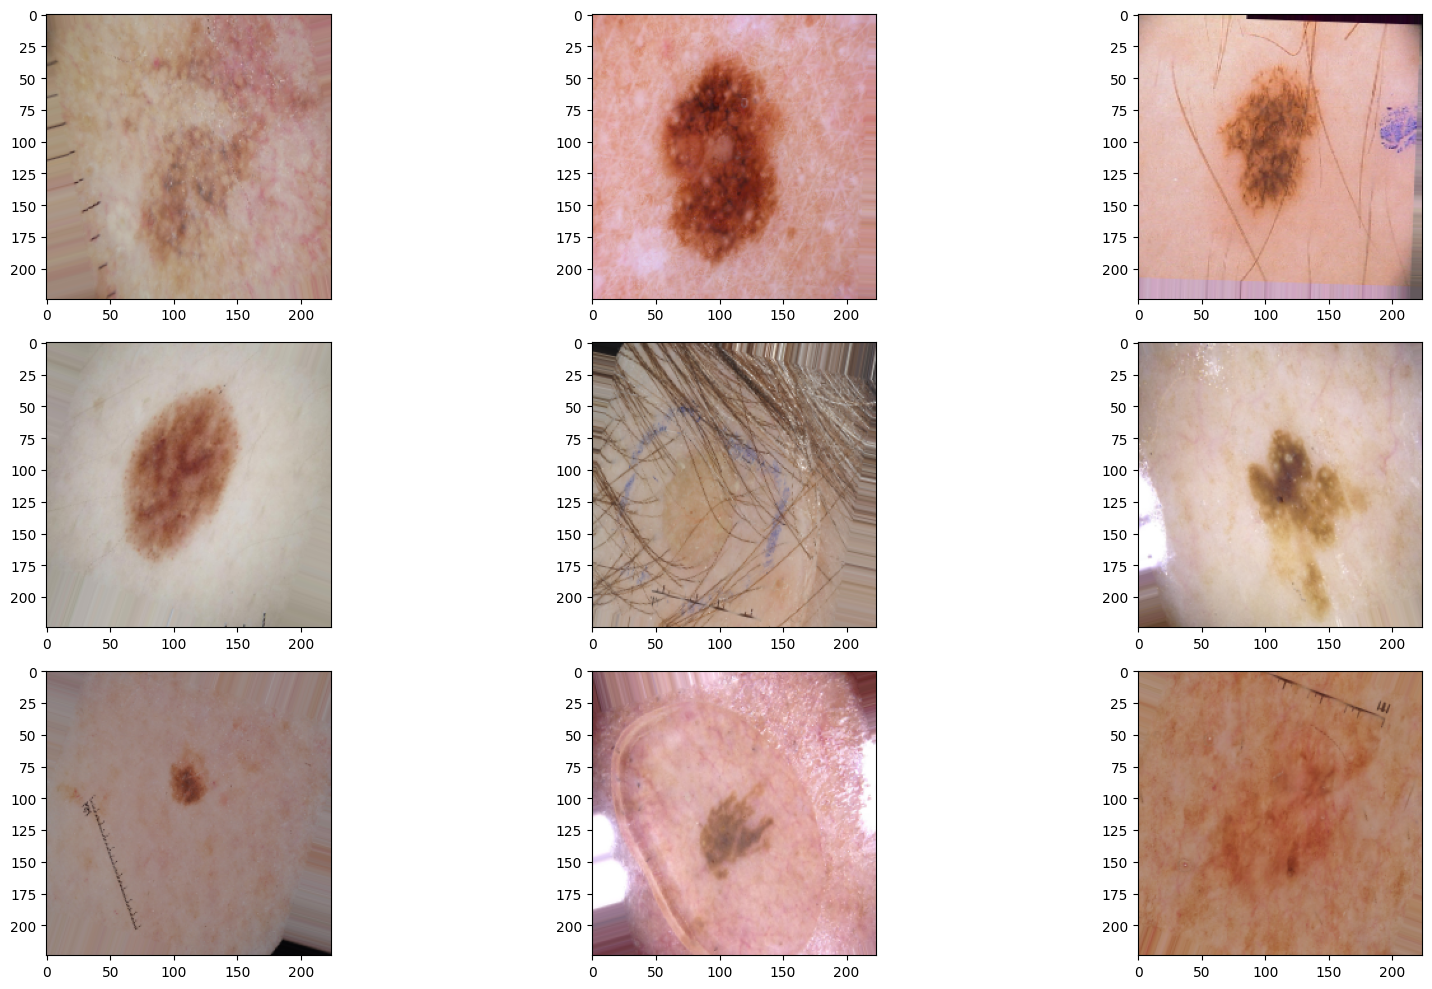

In [22]:
fig, axs = plt.subplots(3, 3, figsize=(18, 10))
for ax in axs.flat:
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        ax.imshow(image)
        break
plt.tight_layout()
plt.show()

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, Activation, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# загружаем предварительно обученную модель VGG16
vgg16_net = VGG16(weights = 'imagenet',
                  include_top = False, # отключаем часть отвечающую за классификацию этой сети
                  input_shape = (HEIGHT_SIZE, WIDTH_SIZE, CHANNELS))

# дообучим несколько блоков сети
for layer in vgg16_net.layers:
    if 'block4' in layer.name or 'block5' in layer.name:
        layer.trainable = True
    else:
        layer.trainable = False

# Создаем модель
model = Sequential()

# Добавляем VGG16
model.add(vgg16_net)

# добавляем свои слои для классификации
model.add(Conv2D(64, (3,3), padding="same", activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), padding="same", activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))

# model.add(Conv2D(256, (3,3), padding="same", activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(3, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(learning_rate=1e-05, beta_1=0.9, beta_2=0.9999, epsilon=1e-08),
              metrics = ['accuracy'])

model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 conv2d (Conv2D)             (None, 7, 7, 64)          294976    
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 64)          0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 3, 3, 64)          0         
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 1, 1, 128)         0 

In [24]:
# рассчитываем веса классов

'''
так как у меня есть дисбаланс классов, я использую взвешивание классов в
функции потерь, чтобы уделить больше внимания менее представленным классам.
'''

from sklearn.utils.class_weight import compute_class_weight

# рассчет весов класса
class_weight = compute_class_weight('balanced',
                                    classes = np.unique(train_df['Label']),
                                    y = train_df['Label'])

class_weight_dict = dict(enumerate(class_weight))

In [25]:
history_model = model.fit(train_generator,
                          epochs = 60,
                          steps_per_epoch = len(train_generator),
                          validation_data = valid_generator,
                          validation_steps = len(valid_generator),
                          class_weight = class_weight_dict)

Epoch 1/60


2024-03-27 13:09:24.754960: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1711544981.638783     147 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


111/111 [==============================] - 627s 5s/step - loss: 1.1542 - accuracy: 0.3242 - val_loss: 1.0936 - val_accuracy: 0.3616
Epoch 2/60
111/111 [==============================] - 473s 4s/step - loss: 1.1047 - accuracy: 0.3457 - val_loss: 1.0891 - val_accuracy: 0.4610
Epoch 3/60
111/111 [==============================] - 474s 4s/step - loss: 1.0989 - accuracy: 0.3510 - val_loss: 1.0816 - val_accuracy: 0.4486
Epoch 4/60
111/111 [==============================] - 483s 4s/step - loss: 1.0887 - accuracy: 0.3833 - val_loss: 1.0557 - val_accuracy: 0.5175
Epoch 5/60
111/111 [==============================] - 467s 4s/step - loss: 1.0728 - accuracy: 0.4053 - val_loss: 1.0220 - val_accuracy: 0.5096
Epoch 6/60
111/111 [==============================] - 483s 4s/step - loss: 1.0485 - accuracy: 0.4562 - val_loss: 0.9827 - val_accuracy: 0.5729
Epoch 7/60
111/111 [==============================] - 486s 4s/step - loss: 1.0058 - accuracy: 0.5008 - val_loss: 0.9036 - val_accuracy: 0.5966
Epoch 8/60

In [26]:
model.save('skin1.h5')

<Figure size 640x480 with 0 Axes>

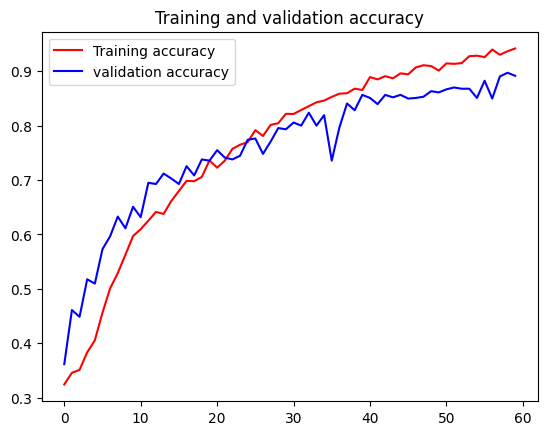

<Figure size 640x480 with 0 Axes>

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history_model.history['accuracy']
val_acc = history_model.history['val_accuracy']
loss = history_model.history['loss']
val_loss = history_model.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc= 0)
plt.figure()

<Figure size 640x480 with 0 Axes>

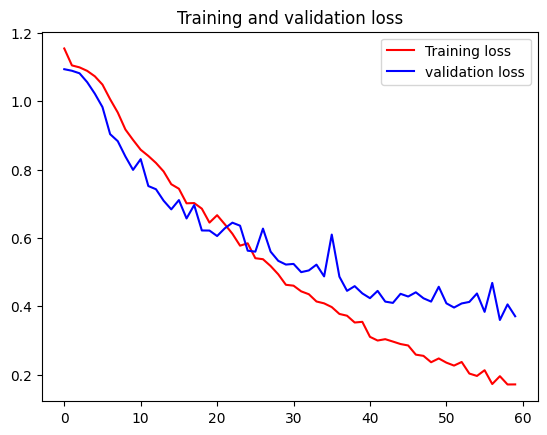

<Figure size 640x480 with 0 Axes>

In [28]:
loss = history_model.history['loss']
val_loss = history_model.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss,'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'validation loss')
plt.title('Training and validation loss')
plt.legend(loc= 0)
plt.figure()

In [29]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

35/35 [==============================] - 123s 4s/step - loss: 0.3698 - accuracy: 0.8861
Test Loss: 0.3698
Test Accuracy: 88.61%


In [ ]:

from sklearn.metrics import confusion_matrix
from tqdm import tqdm
from tensorflow.keras.utils import load_img

IMAGE_SIZE = (WIDTH_SIZE, HEIGHT_SIZE)

# Загружаем модель и выполняем предсказания для тестовых данных
predictions = []
for filename in tqdm(test_df['File_path'], desc="Predicting"):
    img = load_img(filename, target_size=IMAGE_SIZE)
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    predictions.append(np.argmax(model.predict(img_array, verbose=0)))

# Загружаем истинные метки тестовых данных
true_labels = test_df['Label'].map({'melanoma': 0, 'nevus': 1, 'seborrheic_keratosis': 2})

# Создаем матрицу ошибок
conf_matrix = confusion_matrix(true_labels, predictions)

In [ ]:
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
from tensorflow.keras.utils import load_img

IMAGE_SIZE = (WIDTH_SIZE, HEIGHT_SIZE)

# Загружаем модель и выполняем предсказания для тестовых данных
predictions = []
for filename in tqdm(test_df['File_path'], desc="Predicting"):
    img = load_img(filename, target_size=IMAGE_SIZE)
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    predictions.append(np.argmax(model.predict(img_array, verbose=0)))

# Загружаем истинные метки тестовых данных
true_labels = test_df['Label'].map({'melanoma': 0, 'nevus': 1, 'seborrheic_keratosis': 2})

# Создаем матрицу ошибок
conf_matrix = confusion_matrix(true_labels, predictions)

In [ ]:
import seaborn as sns

class_labels = ['melanoma', 'nevus', 'seborrheic_keratosis']

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from tensorflow.keras.utils import load_img

IMAGE_SIZE = (WIDTH_SIZE, HEIGHT_SIZE)

# Выберем следующие 25 изображений (начиная с 51-го)
start_index = 0
end_index = start_index + 25
sample_test = test_df.iloc[start_index:end_index]

# Подготовка данных для вывода
filenames = sample_test['File_path'].tolist()
categories = sample_test['Label'].tolist()

# Подготовка фигуры для отображения результатов
plt.figure(figsize=(12, 12))

# Проход по всем изображениям
for i, (filename, category) in enumerate(zip(filenames, categories), start=1):
    img = load_img(filename, target_size=IMAGE_SIZE)
    img_array = np.array(img) / 255.0  # Нормализуем значения пикселей
    img_array = np.expand_dims(img_array, axis=0)  # Добавляем размерность пакета
    predictions = model.predict(img_array)[0]

    class_labels = ['melanoma', 'nevus', 'seborrheic_keratosis']
    prediction_class = class_labels[np.argmax(predictions)]
    prediction_probabilities = predictions

    correct_prediction = prediction_class == category
    color = 'green' if correct_prediction else 'red'

    plt.subplot(5, 5, i)
    plt.imshow(img)
    plt.xlabel(f'Actual: {category}\n'
               f'Predicted_class: {prediction_class}\n'
               f'm: {prediction_probabilities[0]:.2%}, '
               f'n: {prediction_probabilities[1]:.2%}, '
               f's: {prediction_probabilities[2]:.2%}',
               color=color)
    plt.xticks([])  # Убираем метки по оси X
    plt.yticks([])  # Убираем метки по оси Y

plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Загружаем изображение
img_path = '/kaggle/input/1231231313/photo_2024-03-24_20-51-03.jpg'  # Путь к вашему изображению
img = image.load_img(img_path, target_size=IMAGE_SIZE)

# Преобразуем изображение в массив данных
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Нормализуем значения пикселей

# Получаем предсказание модели
predictions = model.predict(img_array)[0]

# Определяем класс предсказания
class_labels = ['melanoma', 'nevus', 'seborrheic_keratosis']
prediction_class = class_labels[np.argmax(predictions)]

# Отображаем результат
print(f'Predicted class: {prediction_class}')
print(f'Probabilities: m: {predictions[0]:.2%}, n: {predictions[1]:.2%}, s: {predictions[2]:.2%}')

img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()